In [39]:
# @title Import dependancies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dimension of x: (100, 2)
dimension of y: (100, 1)


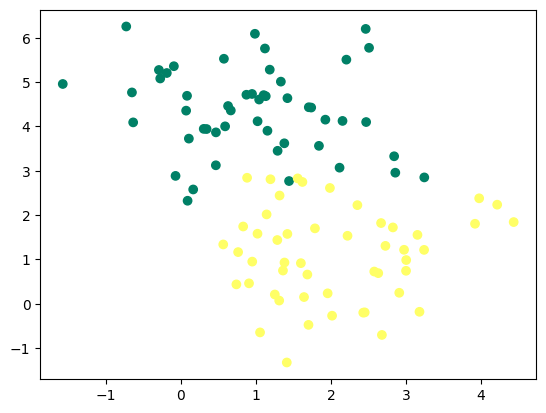

In [40]:
# @title Create dataset with 100 datas and 2 variable
x,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

# displays x and y dimensions
print("dimension of x:", x.shape)
print("dimension of y:", y.shape)

plt.scatter(x[:,0], x[:,1], c=y, cmap="summer")

In [41]:
# @title createt initialization function

def initialization(X):
  """
  ceci nous donnera un vecteur W (2,1 ) car l'idée c'est d'avoir un vecteur
  w qui contient autant de parametre qu'il y'a de variable
  """
  W = np.random.randn(X.shape[1], 1)

  """ pour le parametre b(biais) nous lui passons un nombre réel
  car la fonction d'initialisation est z = w1x1 + w2x2 + b
  """
  b = np.random.randn(1)

  return (W, b)

# test
W, b = initialization(x)
print(W.shape)
print(b.shape)

(2, 1)
(1,)


In [42]:
# @title implement our model function
def model(X, W, b):
  """
    the first things we are doing is build Z function (Z= XW + b)
    then we are compute activation function A = 1 / 1 + e(-Z)
  """
  Z = X.dot(W) + b
  A = 1 / (1 + np.exp(-Z))

  return A

A = model(x, W, b)
A.shape

(100, 1)

In [43]:
# @title implement the Log Loss function(fonction coût)

def log_loss(A, y):
  """
    in theorie L = -1/m sum(log(ai)*yi + (1-yi)*log(1-ai))
    m = number of data in our dataset then m = len(y)
  """
  return  1 / len(y) * np.sum(-y * np.log(A) - (1 - y)*np.log(1 - A))

  # this function return a real number which measure of error our model
# test
log_loss(A, y)

0.6627360478046863

In [44]:
# @title Create Gradient function

def gradients(A, x, y):
  """
    we have two gradients the jacobien that we note dW and db( derivative of
    log_loss function with respect to b)
    dW = 1/m * trans(X).(A-Y)
    db = 1 /m * sum(A-Y)
  """
  dW = 1 / len(y) * np.dot(x.T, A-y)
  db = 1 / len(y) * np.sum(A - y)
  return (dW, db)
# test
dw,db= gradients(A, x, y)
print(dw.shape)
db

(2, 1)


-0.27293116229244374

In [50]:
# @title build the update function

"""
this function take as input the gradients, W, b and learning rate
"""
def update(dW, db, W, b, learning_rate):
  # nous allons implementer l'agorithme de la descencte de gradient
  """
  wi = wi - a(dl/dwi)  a= learning rate and (dl/dwi) = dW
  bi = bi - a(dl/dbi)  (dl/dbi) = db
  """
  W = W - learning_rate * dW
  b = b - learning_rate * db

  return (W, b)

# test
W, b = update(dw, db, W, b, 2)
W

array([[ 2.4362447 ],
       [-0.35319447]])

In [55]:
# @title build our Artificial neural

"""
  cette fonction va prendre en entré nos données x et y , un pas d'apprentissage
  pour notre fonction de mise a jour et nombre d'iteration pour notre algo
  d'apprentissage
"""
def artificial_neuron(X, y, learning_rate=0.5, n_iter=100):
  # initialization of parameter w and b
  W,b = initialization(X)

  Loss = []
  # create learning loop
  for i in range(n_iter):
    # launch result of our model
    A = model(X, W, b)

    # capture error of our model
    Loss.append(log_loss(A, y))

    #create dW, db gradient
    dW,db = gradients(A, X, y)

    # update W and b parameters
    W, b = update(dW,db, W, b, learning_rate)

  plt.plot(Loss)
  plt.show()

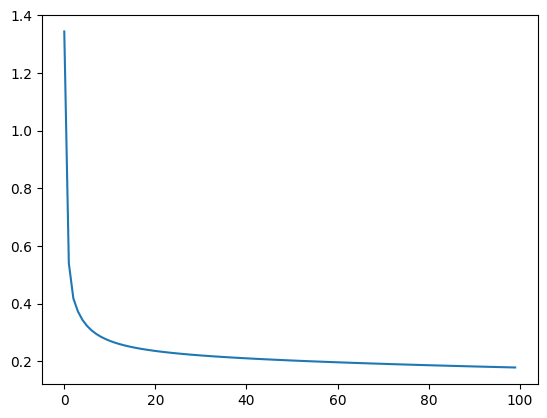

In [56]:
artificial_neuron(x, y)